In [131]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

In [269]:
def standard_error(y_true, y_pred):
    y_true_t = y_true.tolist()
    
    y_pred_t = y_pred.tolist()
    sq1 = [int(y_true_t[i] == y_pred_t[i]) for i in range(len(y_true_t))]
    sq2 = [sq1[i] * sq1[i] for i in sq1]
    se = np.mean(sq2) - np.mean(sq1)*np.mean(sq1)
    return se

In [2]:
#os.chdir("C:/Users/pc/Downloads/KHMT/HK4/AI.Assignment2/src/skitlearn.randomforest/")
#os.system("dir > test.txt")
#f = open("test.txt", 'r')
#t = f.read()
#print(t)
np.seterr(divide='ignore', invalid='ignore')
# Initialize Classifier
RandomForest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='sqrt')

In [3]:
# ---------------------------------    
# Block 1: Doc va xu ly so bo thong tin
# Doc thong tin tu file csv
df01=pd.read_csv('bank-additional/bank-additional-full.csv', sep=';',header=0)
# Xoa cac hang chua thong tin trong
df02=df01.dropna(axis=1, how='all')
# Xoa cac cot chua thong tin trong
df=df02.dropna(axis=0, how='any')
# Kieu du lieu cua df
cols=df.dtypes
# Lay cac cot cua df
colnms=df.columns
# End Block 1
# ---------------------------------

In [4]:
# ---------------------------------
# Block 2: Dem va lay ra cac cot co kieu 'object'
# Bien dem so cot kieu object
i=0
# List luu lai cac cot kieu object
cat_cols=[]
# dem so cot thoa man va luu vao cat_cols
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1
# End Block 2
# ---------------------------------

In [5]:
# ---------------------------------
# Block 3: Tach ra thong tin khach hang va ket qua
# Lay model moi cho du lieu
df1=pd.get_dummies(df,columns=cat_cols)
# So record
n=len(df1.index)
# So cot
m=len(df1.columns)
# Thong tin cua khach hang
x_all=df1.iloc[:,0:(m-2)]
# Khach hang co cho vay hay khong
y_all=df1['y_yes']
# End Block 3
# ---------------------------------

In [6]:
# ---------------------------------
# Block 4: Scale lai du lieu cua tap train va tap test
# Chia du lieu thanh 2 tap train va test
x_trn, x_tst, y_trn, y_tst = train_test_split(x_all, y_all, test_size=0.8, random_state=42)
# Tao class Scaler de chia ti le
scaler = MinMaxScaler()
# Tinh min va max cua data de chia ti le
scaler.fit(x_trn)
# Chia ti le lai cho tap train
x_trn_n=scaler.transform(x_trn)
# Chia ti le lai cho tap test
x_tst_n=scaler.transform(x_tst)
# End block 4
# ---------------------------------

In [7]:
# Block 5: Train Model, tim do chinh xac va tim cac bien co trong so cao
# Chon kieu Random Forest
clf=RandomForest
# Xay dung Forest Tree tu Du lieu train: x_trn_n (data input) va y_trn_n (target output)
model=clf.fit(x_trn_n,y_trn)
# Tien doan gia tri cua mau du lieu test
y_pred=model.predict(x_tst_n)
# Tinh phan tram so record tien doan dung
acc2=float((y_pred==y_tst).sum())/float(len(y_tst))
# In ra do chinh xac cua Model
print("Random forest accuracy: {0:.3f}%".format(acc2))
# Lay ra trong so cua cac bien
imp=model.feature_importances_
# Gan trong so cua cac bien voi ten bien (ten cac cot)
var2imp=dict(zip(list(df1),imp))
# Them tieu de cho bang va sap xep bang
var2imp_sorted=pd.DataFrame(columns=['variable','weight'])
# Sort du lieu trong bang theo tri tuyet doi cua ham weight
for key in sorted(var2imp, key=lambda k:abs(var2imp[k]),reverse=True):
    temp=pd.DataFrame([[key,var2imp[key]]],columns=['variable','weight'])
    var2imp_sorted=var2imp_sorted.append(temp)
# Lay ra 10 bien co tri tuyet doi cua ham weight lon nhat
print("Top 10 important variables:")
print(var2imp_sorted[0:10])
# End Block 5
# ---------------------------------

Random forest accuracy: 0.902%
Top 10 important variables:
               variable    weight
0              duration  0.263661
0             euribor3m  0.138022
0                 pdays  0.116640
0           nr.employed  0.111588
0      poutcome_success  0.058766
0        cons.price.idx  0.049913
0  poutcome_nonexistent  0.045572
0         cons.conf.idx  0.037388
0      poutcome_failure  0.026118
0                   age  0.022976


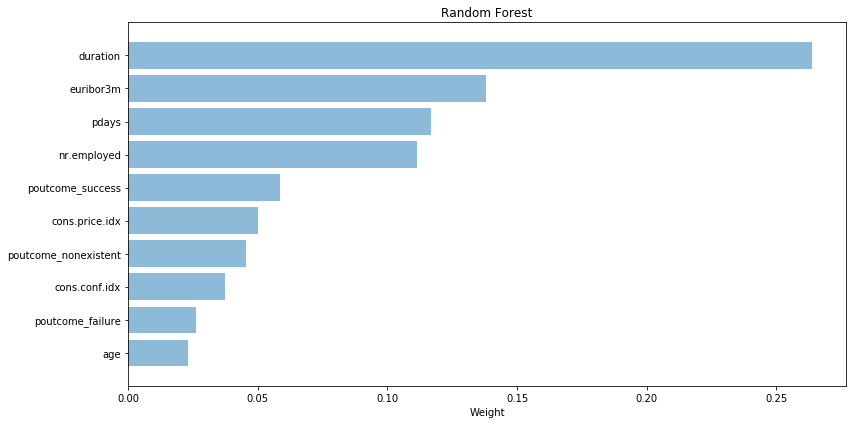

In [8]:
# ---------------------------------
# Block 6: Ve bieu do trong so cua cac bien
# Tach ten cac bien co trong so cao
var_names=list(var2imp_sorted['variable'][0:10])
# Tach trong so cua cac bien
var_imp=list(var2imp_sorted['weight'][0:10])
# Xep lai ten bien
y_pos = np.arange(len(var_names),0,-1)
# Tao bieu do
fig = plt.figure(figsize=(12, 6))
# Them bieu do con
plt.subplot(1, 1, 1)
# Set cac thuoc tinh cho bieu do
plt.barh(y_pos, var_imp, align='center', alpha=0.5)
# Gan nhan cac bien vao bieu do
plt.yticks(y_pos, var_names)
# Gan nhan cho trong so
plt.xlabel('Weight')
# Dat ten cho bieu do
plt.title('Random Forest')
# Chinh sua bieu do
plt.ylim(0,11)
# Chinh sua bieu do
plt.tight_layout()
# Save bieu do
fig.savefig('plot.png',dpi=400)
# End block 6
# ---------------------------------

In [9]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt')

param_grid = {
                "n_estimators" : [9, 18, 27],
                "max_depth" : [1, 5, 10],
                "min_samples_leaf" : [1, 4, 8]}
                
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)
CV_rfc.fit(x_trn_n, y_trn)
print(CV_rfc.best_params_)

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 9}


In [10]:
_max_depth = CV_rfc.best_params_['max_depth']
_min_samples_leaf = CV_rfc.best_params_['min_samples_leaf']
_n_estimators = CV_rfc.best_params_['n_estimators']
rfcs = RandomForestClassifier(max_depth=_max_depth, 
                              min_samples_leaf=_min_samples_leaf, 
                              n_estimators=_n_estimators, 
                              max_features='sqrt')
model=clf.fit(x_trn_n,y_trn)
y_pred=model.predict(x_tst_n)
acc2=float((y_pred==y_tst).sum())/float(len(y_tst))
print("Random forest accuracy: {0:.3f}%".format(acc2))

Random forest accuracy: 0.904%


In [25]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
param_distributions = {"n_estimators" : [9, 12, 15, 18, 21, 24, 27],
                       "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                       "min_samples_leaf" : [1, 2, 4, 6, 8]}

RSCV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions, cv=10)

RSCV_rfc.fit(x_trn_n, y_trn)
print(RSCV_rfc.best_params_)

{'n_estimators': 27, 'min_samples_leaf': 1, 'max_depth': 9}


In [281]:
def plot_param_max_depth(list_of_max_depth, n_estimators, min_samples_leaf):
    list_of_acc = []
    for max_depth_i in list_of_max_depth:
        rfc_t = RandomForestClassifier(max_depth=max_depth_i,
                                    min_samples_leaf=min_samples_leaf,
                                    n_estimators=n_estimators,
                                    max_features='sqrt')
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
    plt.figure()
    plt.xlabel("Max depth")
    plt.ylabel("Accuracy")
    plt.plot(list_of_max_depth, list_of_acc, 'o-', color='r', label='Accuracy')
    plt.show()

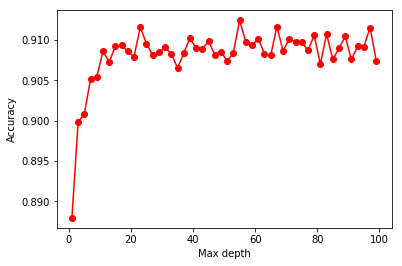

In [282]:
list_of_md = [i for i in range(1, 100, 2)]
plot_param_max_depth(list_of_md, _n_estimators, _min_samples_leaf)

In [278]:
def plot_param_n_estimators(max_depth, list_of_n_estimators, min_samples_leaf):
    list_of_acc = []
    list_of_mse = []
    for n_estimators_i in list_of_n_estimators:
        rfc_t = RandomForestClassifier( max_depth=max_depth,
                                        min_samples_leaf=min_samples_leaf,
                                        n_estimators=n_estimators_i,
                                        max_features='sqrt')
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
        
        mse_t = mean_squared_error(y_tst, y_pred_t)    
        list_of_mse.append(mse_t)
    plt.figure()
    plt.xlabel("Number of Estimators")
    plt.ylabel("Accuracy")
    plt.plot(list_of_n_estimators, list_of_acc, 'o-', color='r', label="Accuracy")
    plt.figure()
    plt.xlabel("Number of Estimators")
    plt.ylabel("Mean Squared Error")
    plt.plot(list_of_n_estimators, list_of_mse, 'o-', color='g', label='Mean Squared Error')
    plt.show()


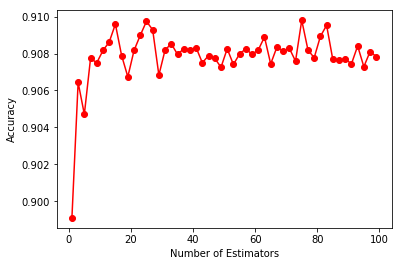

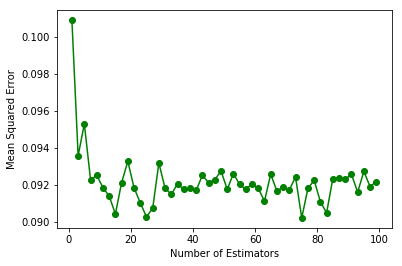

In [279]:
list_of_nes = [i for i in range(1, 100, 2)]
plot_param_n_estimators(_max_depth, list_of_nes, _min_samples_leaf)

In [137]:
def plot_param_min_samples_leaf(max_depth, n_estimators, list_of_min_samples_leaf):
    list_of_acc = []
    list_of_mse = []
    for min_samples_leaf_i in list_of_min_samples_leaf:
        rfc_t = RandomForestClassifier( max_depth=max_depth,
                                        min_samples_leaf=min_samples_leaf_i,
                                        n_estimators=n_estimators,
                                        max_features='sqrt')
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
        
        mse_t = mean_squared_error(y_tst, y_pred_t)    
        list_of_mse.append(mse_t)
    plt.figure()
    plt.xlabel("Min samples leaf")
    plt.ylabel("Accuracy")
    plt.plot(list_of_min_samples_leaf, list_of_acc, 'o-', color='r', label="Accuracy")
    plt.figure()
    plt.xlabel("Min samples leaf")
    plt.ylabel("Mean Squared Error")
    plt.plot(list_of_min_samples_leaf, list_of_mse, 'o-', color='g', label='Mean Squared Error')
    plt.show()

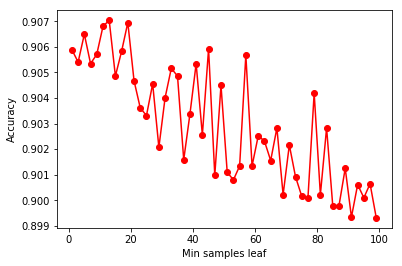

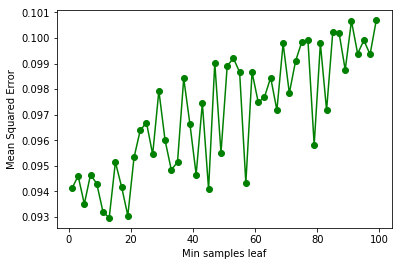

In [138]:
list_of_msl = [i for i in range(1, 100, 2)]
plot_param_min_samples_leaf(_max_depth, _n_estimators, list_of_msl)

In [139]:
def plot_param_max_features(max_depth, n_estimators, min_samples_leaf, list_of_max_features):
    list_of_acc = []
    list_of_mse = []
    for max_features_i in list_of_max_features:
        rfc_t = RandomForestClassifier(max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    n_estimators=n_estimators,
                                    max_features=max_features_i)
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
        
        mse_t = mean_squared_error(y_tst, y_pred_t)    
        list_of_mse.append(mse_t)
    plt.figure()
    plt.xlabel("Max features")
    plt.ylabel("Accuracy")
    plt.plot(list_of_max_features, list_of_acc, 'o-', color='r', label="Accuracy")
    plt.figure()
    plt.xlabel("Max features")
    plt.ylabel("Mean Squared Error")
    plt.plot(list_of_max_features, list_of_mse, 'o-', color='g', label='Mean Squared Error')
    plt.show()

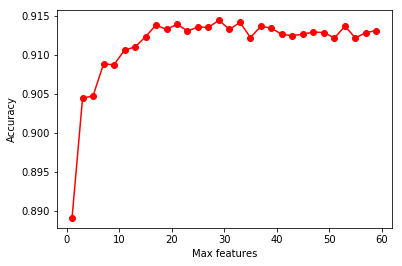

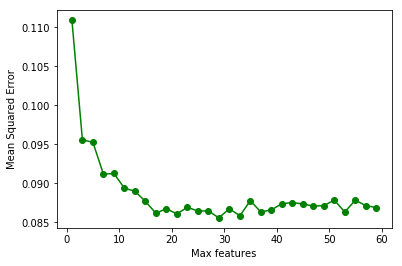

In [140]:
list_of_mf = [i for i in range(1, 60, 2)]
plot_param_max_features(_max_depth, _n_estimators, _min_samples_leaf, list_of_mf)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

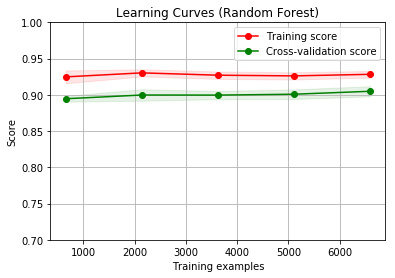

In [16]:
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier(max_depth=_max_depth, 
                                  min_samples_leaf=_min_samples_leaf, 
                                  n_estimators=_n_estimators, 
                                  max_features='sqrt')
plot_learning_curve(estimator, title, x_trn_n, y_trn, (0.7, 1.00), cv=cv, n_jobs=4)

plt.show()

In [272]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import forestci as fci
from sklearn.datasets import make_classification

Failed to import duecredit due to No module named 'duecredit'


In [274]:
spam_X, spam_y = make_classification(5000)

# split the datainto training and test set
spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(
                                                       spam_X, spam_y,
                                                       test_size=0.2)



In [304]:
# create RandomForestClassifier
n_trees = 500
spam_RFC = RandomForestClassifier(max_features=5, n_estimators=n_trees,
                                  random_state=42)
test_rfc = RandomForestClassifier(max_features = 'sqrt',
                                  n_estimators = _n_estimators, 
                                  max_depth = _max_depth,
                                  min_samples_leaf = _min_samples_leaf)

spam_RFC.fit(spam_X_train, spam_y_train)

test_rfc.fit(x_trn_n, y_trn)

spam_y_hat = spam_RFC.predict_proba(spam_X_test)

test_y_hat = test_rfc.predict_proba(x_tst_n)

idx_spam = np.where(spam_y_test == 1)[0]
idx_ham = np.where(spam_y_test == 0)[0]

idx_yes = np.where(test_y_hat == 1)[0]
idx_no = np.where(test_y_hat == 0)[0]


In [308]:
test_a = np.where(spam_y_test == 1)
test_b = np.where(test_y_hat == 1)
#print(test_b)
tss = spam_y_hat[idx_spam, 1]
#tsss = [spam_y_hat[]]
print(tss)

<class 'numpy.ndarray'>
[0.982 0.962 0.986 0.95  0.974 0.804 0.45  0.984 0.954 0.952 0.83  0.974
 1.    0.988 0.976 0.938 0.958 0.888 0.996 0.986 0.984 0.972 0.998 0.892
 0.554 0.994 0.984 0.952 0.826 0.964 0.582 0.95  1.    0.856 0.99  0.996
 0.996 0.956 0.698 0.892 0.998 0.85  0.984 0.906 0.994 0.812 0.968 0.922
 0.952 0.988 0.966 0.952 0.77  0.896 0.79  0.972 0.986 0.908 0.984 0.98
 0.994 0.368 0.762 0.888 0.986 1.    0.998 1.    0.468 0.982 0.898 0.926
 0.994 0.984 0.368 0.998 0.97  0.94  0.958 0.968 0.974 0.842 0.996 0.988
 0.934 0.728 0.548 0.93  0.994 0.314 0.874 0.974 0.996 0.292 0.988 0.978
 0.974 0.99  0.974 0.956 0.976 1.    0.874 0.748 0.994 0.998 0.99  0.966
 0.48  0.842 0.94  0.998 0.96  0.996 0.986 0.966 0.82  0.99  0.98  0.912
 0.992 0.978 0.984 0.988 0.934 0.884 0.986 0.986 0.958 0.972 0.976 0.87
 0.996 1.    0.998 0.998 0.918 0.946 0.976 0.958 0.922 0.956 0.948 0.946
 0.99  0.332 0.386 0.762 0.386 0.828 0.468 0.604 0.994 0.796 0.136 0.998
 0.976 0.996 0.98  0.974 0.99

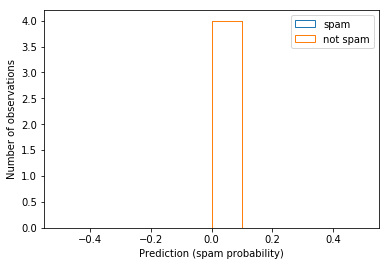

In [305]:
# Histogram predictions without error bars:
fig, ax = plt.subplots(1)
#ax.hist(spam_y_hat[idx_spam, 1], histtype='step', label='spam')
#ax.hist(spam_y_hat[idx_ham, 1], histtype='step', label='not spam')
#ax.hist(test_y_hat[idx_yes, 1], histtype='step', label='spam')
#ax.hist(test_y_hat[idx_no, 1], histtype='step', label='not spam')
ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Number of observations')
plt.legend()



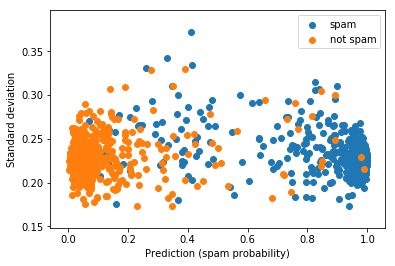

In [277]:
# Calculate the variance
spam_V_IJ_unbiased = fci.random_forest_error(spam_RFC, spam_X_train,
                                             spam_X_test)

# Plot forest prediction for emails and standard deviation for estimates
# Blue points are spam emails; Green points are non-spam emails
fig, ax = plt.subplots(1)
ax.scatter(spam_y_hat[idx_spam, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_spam]),
           label='spam')

ax.scatter(spam_y_hat[idx_ham, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_ham]),
           label='not spam')

ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()